In [7]:
import numpy as np
import Functions
import pickle
import os
from matplotlib.colors import LogNorm

import matplotlib.pyplot as plt

In [8]:
EventNames = ['AGN', 'CART', 'EB', 'ILOT', 'KN_B19', 'KN_K17', 'MIRA', 'Mdwarf',
              'PISN', 'RRL', 'SLSN-I', 'SNII-NMF', 'SNII-Templates', 'SNIIn',
              'SNIa-91bg', 'SNIa-SALT2', 'SNIax', 'SNIbc-MOSFIT',
              'SNIbc-Templates', 'TDE', 'V19_CC+HostXT', 'uLens-Binary',
              'uLens-Single-GenLens', 'uLens-Single_PyLIMA']

EventNames = [EventNames[19]]
EventNames

['TDE']

In [9]:
def Enquiry(HashTable, InfoDict, Band1, Band2, dT1, dT2, dMag=None, Color=None):

    Ind1 = InfoDict['Bands'].index(Band1)
    Ind2 = InfoDict['Bands'].index(Band2)

    if dT1<InfoDict['dT1s'][0] or dT1>InfoDict['dT1s'][-1]:
        raise ValueError('The value of dT1 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT1s'][0], InfoDict['dT1s'][-1]))
        
    else:
        Ind3 = np.where( dT1 >= InfoDict['dT1s'] )[0][-1]

    if dT2<InfoDict['dT2s'][0] or dT2>InfoDict['dT2s'][-1]:
        raise ValueError('The value of dT2 is out of boundary, the available interval is [{:.2f}, {:.2f}].'.format(InfoDict['dT2s'][0], InfoDict['dT2s'][-1]))
    else:
        Ind4 = np.where( dT2 >= InfoDict['dT2s'] )[0][-1]

    Results = HashTable[Ind1, Ind2, Ind3, Ind4]

    if dMag == None:
        pass        
    elif dMag<InfoDict['BinMag'][0] or dMag>=InfoDict['BinMag'][-1]:
        raise ValueError('The value of dMag is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinMag'][0], InfoDict['BinMag'][-1]))
        
    else:
        Results = Results[np.where( dMag >= InfoDict['BinMag'] )[0][-1]]       

    if Color == None:
        pass        
    elif Color<InfoDict['BinColor'][0] or Color>=InfoDict['BinColor'][-1]:
        raise ValueError('The value of Color is out of boundary, the available interval is [{:.2f}, {:.2f}).'.format(InfoDict['BinColor'][0], InfoDict['BinColor'][-1]))
        
    else:
        Results = Results[..., np.where( Color >= InfoDict['BinColor'] )[0][-1] ]

    return Results

In [10]:
File = '/global/cscratch1/sd/lianming/Results/ProbabilityCube_Nov 2_02:51_SNIa-SALT2.pkl'

In [11]:
with open(File, 'rb') as f:
    EventNames = pickle.load(f)
    InfoDict = pickle.load(f)
    HashTable = pickle.load(f)

In [12]:
InfoDict

{'EventNames': ['SNIa-SALT2'],
 'PointsPerDay': 1,
 'Object Number': 10000,
 'Bands': ['g', 'i'],
 'dT1s': array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360, 375,
        390, 405, 420, 435, 450, 465, 480]),
 'dT2s': array([ 30,  60,  90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 390,
        420, 450, 480]),
 'BinMag': array([-2.25, -2.15, -2.05, -1.95, -1.85, -1.75, -1.65, -1.55, -1.45,
        -1.35, -1.25, -1.15, -1.05, -0.95, -0.85, -0.75, -0.65, -0.55,
        -0.45, -0.35, -0.25, -0.15, -0.05,  0.05,  0.15,  0.25,  0.35,
         0.45,  0.55,  0.65,  0.75,  0.85,  0.95,  1.05,  1.15,  1.25,
         1.35,  1.45,  1.55,  1.65,  1.75,  1.85,  1.95,  2.05,  2.15,
         2.25,  2.35,  2.45,  2.55,  2.65,  2.75,  2.85,  2.95,  3.05,
         3.15,  3.25,  3.35,  3.45,  3.55,  3.65,  3.75,  3.85,  3.95,
         4.05]),
 'BinColor': array([-9.25, -8.75, -8.25, -7.75, -7.25, -6.75, -6.25, -5.7

In [13]:
HashTable.shape

(2, 2, 33, 16, 63, 38)

In [15]:
Enquiry(HashTable, InfoDict,'g', 'i', 23, 134, 0, 0)

array(625726, dtype=int32)

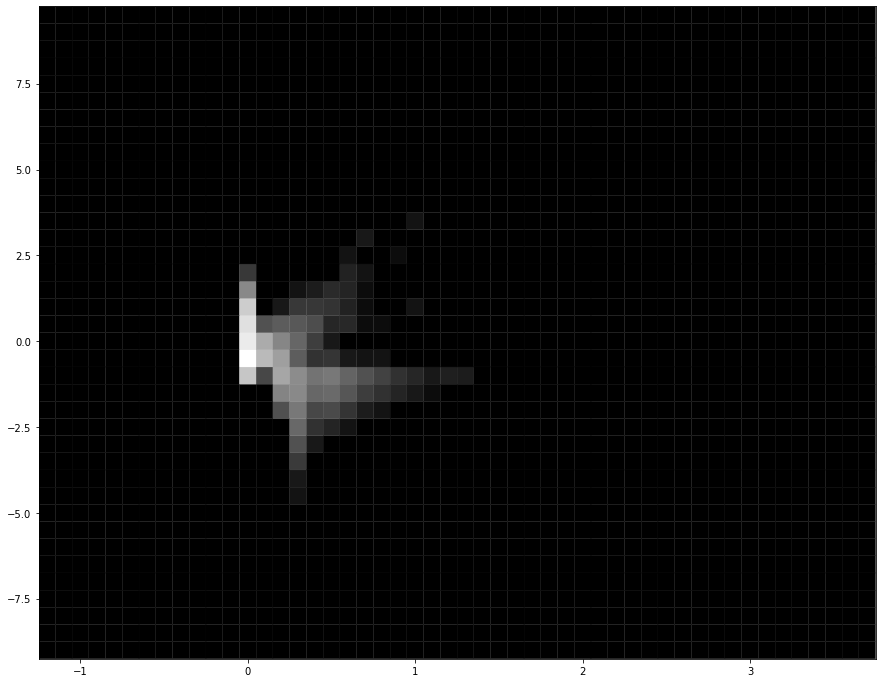

In [6]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

Map = Enquiry(HashTable, InfoDict, 'g', 'i', 60, 450)
plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
# plt.xlim([-0.5, 2])
# plt.ylim([-7.5, 4])
# plt.axis('equal')

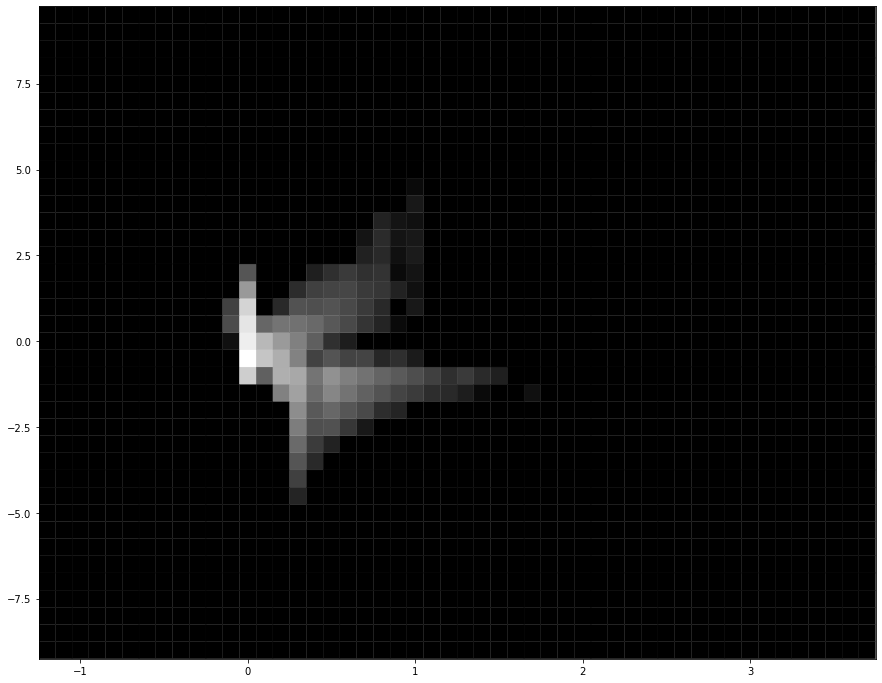

In [49]:
#If dMag and Color are not given, a 2-D array will be returned.
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

Map = Enquiry(HashTable, InfoDict, 'g', 'i', 60, 450)
plt.pcolor(InfoDict['BinMag'], InfoDict['BinColor'], np.transpose(Map)+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map.max()+1), cmap='gist_gray')
# plt.xlim([-0.5, 2])
# plt.ylim([-7.5, 4])
# plt.axis('equal')

In [35]:
Map.max()

195190

(-7.5, 4.0)

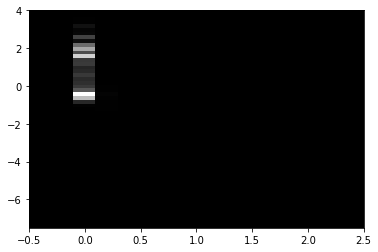

In [ ]:
#If dMag and Color are not given, a 2-D array will be returned.

Map = Enquiry(HashTable, CoordinateDict, 'g', 'i', 60, 450)
plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map[0,0]), cmap='gist_gray')
plt.xlim([-0.5, 2.5])
plt.ylim([-7.5, 4])
# plt.axis('equal')

In [16]:
data = CalculateMap('/content/drive/Shareddrives/FASTlab/PrestoColor2/Interpolated Data', 'SNIa-SALT2', 'g', 'i', 60, 450, PointsPDay=0.1)

||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
Finish!


([<matplotlib.lines.Line2D at 0x7f3a8f9e22d0>],
 <matplotlib.contour.QuadContourSet at 0x7f3a8f9bdd50>)

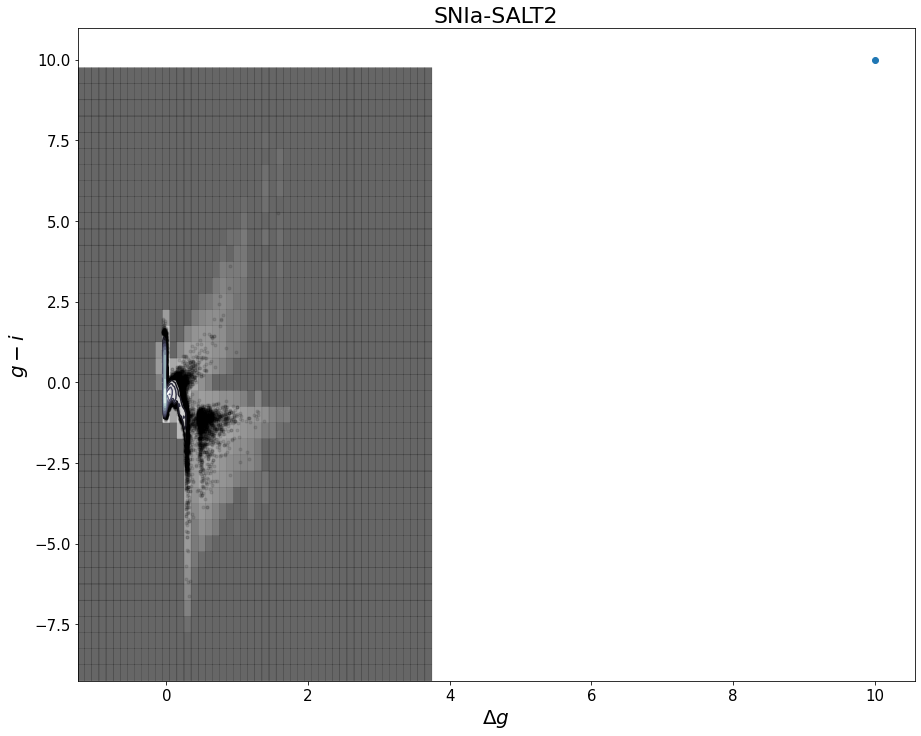

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(15, 12))
ax.set_xlabel("$\Delta {0}$".format('g'), fontsize=20)
ax.set_ylabel('${0}-{1}$'.format('g','i'), fontsize=20)
ax.tick_params(labelsize=15 )
ax.set_title('SNIa-SALT2', fontsize=22)

plt.xlim([-0.3, 1.8])
plt.ylim([-7.5, 4])

plt.pcolor(CoordinateDict['BinMag'], CoordinateDict['BinColor'], np.transpose(Map[0,0])+1, edgecolors='face',
           norm=LogNorm(1, vmax=Map[0,0].max()+1), cmap='gist_gray', alpha=0.6)

ax.scatter([10], [10])

plotting.scatter_contour(data[0], data[1], 
                         threshold=50,log_counts=True, 
                         histogram2d_args=dict(bins=(100,100)), filled_contour=False,
                         plot_args=dict(marker='.', linestyle='none', color='black', alpha=0.1),
                         contour_args=dict(alpha=1, cmap='bone'))

In [15]:
def CalculateMap(PathInterp, EventName, Band1, Band2, dT1, dT2, PointsPDay = 50, Thr=27.5, Save=0, TargetFolder='MapData'):    
    
    FilePath = os.path.join(PathInterp, EventName+'_Interp.pkl')
    
    with open(FilePath, 'rb') as f:
        Interp_load = pickle.load(f)
        TimeRange_load = pickle.load(f)    

    dMag = []
    Color = []

    for II in range(len(Interp_load[Band1])):
        
        if Interp_load[Band1][II]==[] or Interp_load[Band2][II]==[]:
            continue
        
        if II%5000 == 4999:
            print('|')
        elif II%50 == 49:
            print('|', end='' )

        TimeRangeStart = max( TimeRange_load[Band1][II][0], TimeRange_load[Band2][II][0] - dT1/1440 )
        TimeRangeEnd = min( TimeRange_load[Band1][II][1] - dT2/1440, TimeRange_load[Band2][II][1] - dT1/1440 )

        TimeRange = TimeRangeEnd - TimeRangeStart
        SampleNo = np.int(PointsPDay*TimeRange)
        
        XX = np.random.rand(SampleNo)*TimeRange + TimeRangeStart

        Mag1 = Interp_load[Band1][II](XX)
        Mag2 = Interp_load[Band2][II](XX+dT1/1440)
        Mag12 = Interp_load[Band1][II](XX+dT2/1440)

        Mask = (Mag1<Thr) * (Mag2<Thr) *(Mag12<Thr)

        dMag.extend(Mag1[Mask] - Mag12[Mask])
        Color.extend(Mag1[Mask] - Mag2[Mask])
        
    data = np.array([dMag, Color])
    
    if Save == 1:
    
        TargetPath = os.path.join(Path0, TargetFolder)                            
        if not os.path.isdir(TargetPath):
            os.mkdir(TargetPath)
        os.chdir(TargetPath)

        Ind1 = PathInterp.rfind('/')
        Ind2 = PathInterp.rfind('_')
        
        FileName = '{}{}_dT1_{}_dT2_{}_PPD{}_Thr{}_{}_Source_{}.npy'.format(Band1, Band2, dT1, dT2, PointsPDay, Thr, EventName, PathInterp[Ind1+1:Ind2])
        np.save(FileName, data)
        
        print('The data is saved at {} as {}.'.format(TargetPath, FileName))
    
    print('Finish!')
        
    return data

In [13]:
pip install astroML

     |████████████████████████████████| 105 kB 15.7 MB/s eta 0:00:01
  Created wheel for astroML: filename=astroML-0.4.1-py3-none-any.whl size=128672 sha256=17a935d564227f982a972bb67f4e7cf7debe0ceee9b4445c40c6bbefbbca82bf
  Stored in directory: /root/.cache/pip/wheels/d2/65/48/32aab81213722d288c9529e3a6e94cea3f7d6b95b649e6540a
Successfully built astroML


In [14]:
from astroML import plotting

In [5]:
aa = np.array([[1,2],[3,4]])
aa

array([[1, 2],
       [3, 4]])

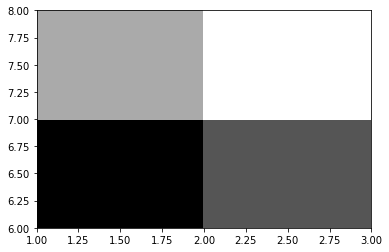

In [8]:
plt.pcolor([1,2,3], [6,7,8], aa, cmap='gist_gray')

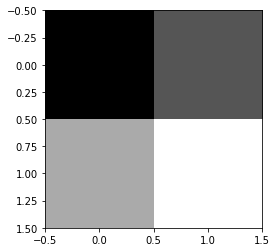

In [ ]:
plt.imshow(aa, cmap='gist_gray')

In [82]:
xx = np.ones(10)*1.999
yy = np.array([0, 0, 0, 3, 3, 4, 4, 4, 4, 4])

In [83]:
xx

array([1.999, 1.999, 1.999, 1.999, 1.999, 1.999, 1.999, 1.999, 1.999,
       1.999])

In [56]:
xbins = np.arange(4)
ybins = np.arange(-0.75, 6.5, 0.5)

In [57]:
ybins

array([-0.75, -0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,
        3.75,  4.25,  4.75,  5.25,  5.75,  6.25])

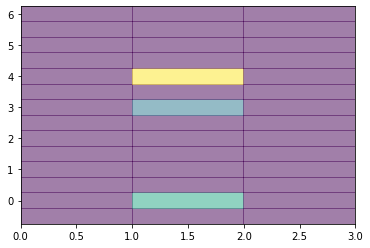

In [58]:
Hist = plt.hist2d(xx, yy, bins=[xbins, ybins], alpha = 0.5)

In [48]:
Hist[0]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [3., 0., 0., 0., 0., 0., 2., 0., 5., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

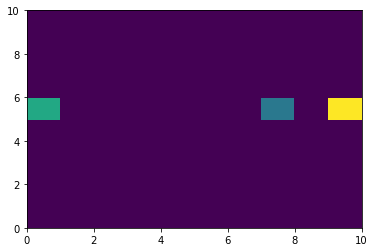

In [ ]:
plt.pcolor(Hist[0])

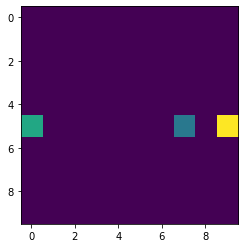

In [ ]:
plt.imshow(Hist[0])

In [103]:
xx = np.arange(0, 10, 0.01)
yy = np.sin(xx)

xbin = np.arange(-0.75, 10.3, 0.5)
ybin = np.arange(-1.7, 1.8, 0.2)

In [94]:
Noise1 = np.random.normal(scale = 0.2, size=1000)
Noise2 = np.random.normal(scale = 0.2, size=1000)

In [90]:
Noise.shape

(1000,)

In [87]:
xx.shape

(1000,)

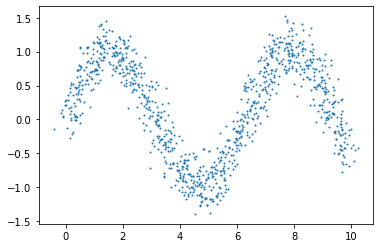

In [95]:
plt.scatter(xx+Noise1,yy+Noise2, s=1)

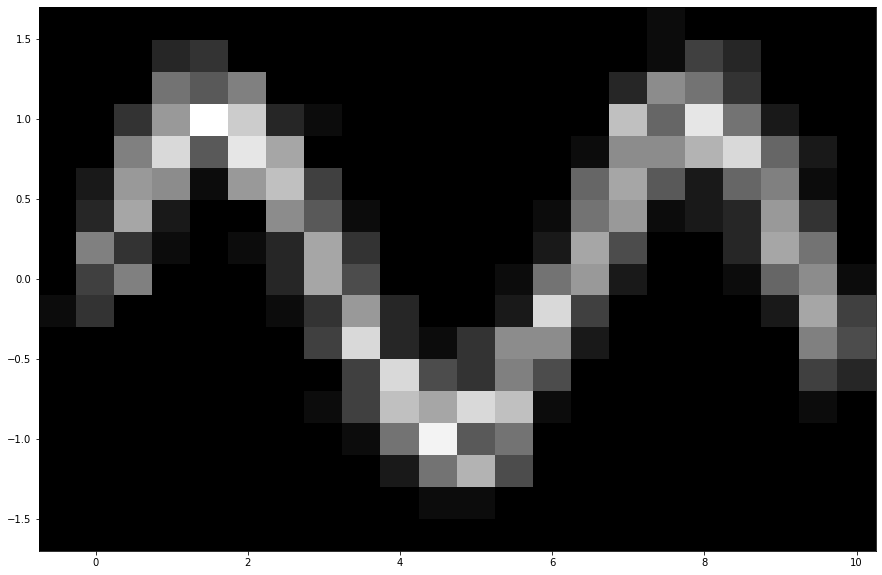

In [118]:
plt.figure(figsize=(15,10))
Hist = plt.hist2d(xx+Noise1,yy+Noise2, bins=[xbin, ybin], cmap='gist_gray')
# plt.colorbar()

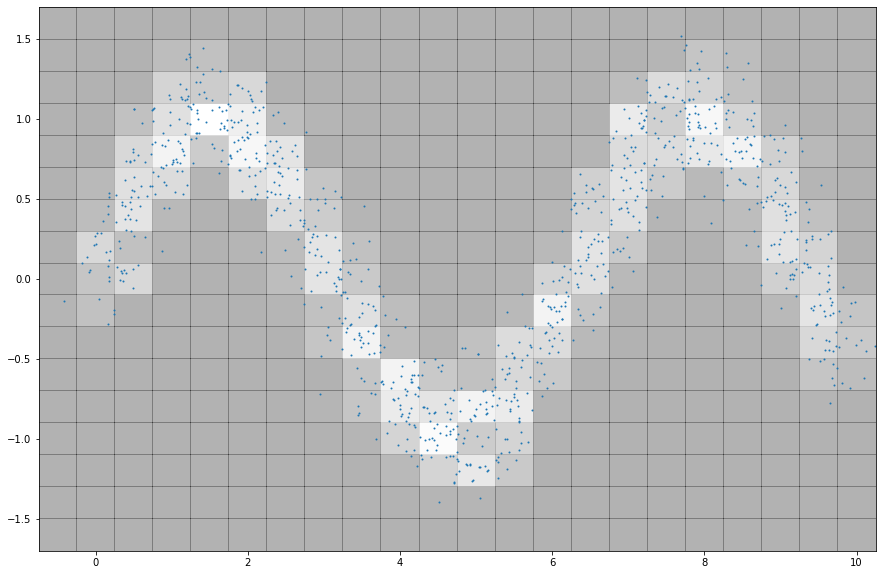

In [117]:
plt.figure(figsize=(15,10))
plt.pcolor(Hist[1], Hist[2], np.transpose(Hist[0]), cmap='gist_gray', alpha=0.3)
plt.scatter(xx+Noise1,yy+Noise2, s=1)

In [108]:
Hist

(array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 11., 14.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 22., 22.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 34.,
         13.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         50.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.,
         28.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 13., 25., 12.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 20., 21.,  9.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  8., 22., 20.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 33., 17.,  0.,  0.,  0.,  0.,  0., 